## Problem 1 a)

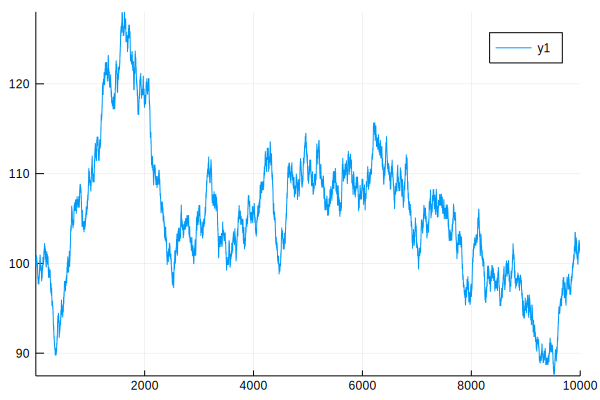

In [1]:
using Plots

S = 100
r = 0.08
T = 1
n = 10000
sigma = 0.3
h = T/n

u = exp(r*h + sigma * sqrt(h))
d = exp(r*h - sigma * sqrt(h))

p_star = (exp(r*h) - d) / (u - d)

path = Array{Float64}(n + 2)

#add in the starting price
path[1] = S

for k in 2:n+2
    if rand() < p_star
        #then we go up
        path[k] = path[k-1] * u
    else
        path[k] = path[k-1] * d
    end
end

plot(path)

## Problem 1 b)

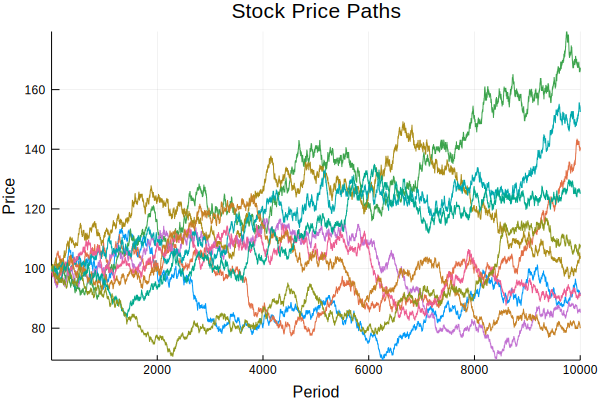

In [2]:
using Plots

function createPath(S, r, sigma, T, n)
    h = T / n
    u = exp(r*h + sigma * sqrt(h))
    d = exp(r*h - sigma * sqrt(h))

    p_star = (exp(r*h) - d) / (u - d)

    path = Array{Float64}(n + 2)

    #add in the starting price
    path[1] = S

    for k in 2:n+2
        if rand() < p_star
            #then we go up
            path[k] = path[k-1] * u
        else
            path[k] = path[k-1] * d
        end
    end
    path
end

p = plot(createPath(100.0, 0.08, 0.3, 1.0, 10000));
plot!(p, title="Stock Price Paths", xlabel="Period", ylabel="Price", legend=false)

for k in 1:9
    plot!(p, createPath(100.0, 0.08, 0.3, 1.0, 10000))
end
display(p)

## 1 c) (Optional)

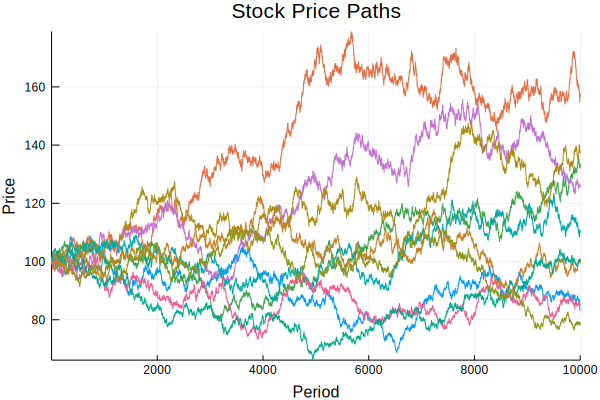

In [13]:
# Threads
# This will work on shared memory (multicore) machines

paths = Array{Array{Float64}}(10)

Threads.@threads for i in 1:10
    paths[i] = createPath(100.0, 0.08, 0.3, 1.0, 10000)
end

p = plot(paths[1]);
plot!(p, title="Stock Price Paths", xlabel="Period", ylabel="Price", legend=false)

for k in 2:10
    plot!(p, paths[k])
end
display(p)

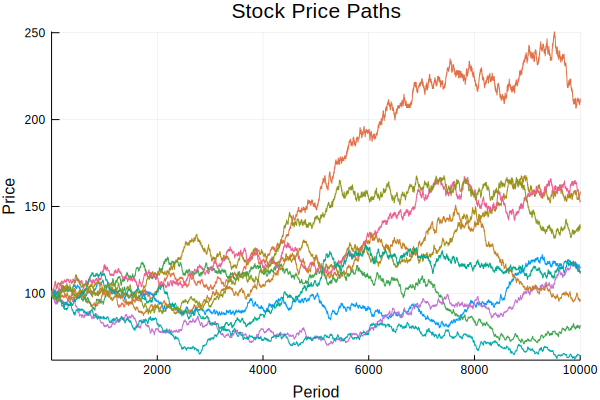

In [9]:
# Distributed parallelism
# This will work across multiple computers and multiple nodes of a cluster

@everywhere function createPath(S, r, sigma, T, n)
    h = T / n
    u = exp(r*h + sigma * sqrt(h))
    d = exp(r*h - sigma * sqrt(h))

    p_star = (exp(r*h) - d) / (u - d)

    path = Array{Float64}(n + 2)

    #add in the starting price
    path[1] = S

    for k in 2:n+2
        if rand() < p_star
            #then we go up
            path[k] = path[k-1] * u
        else
            path[k] = path[k-1] * d
        end
    end
    path
end

f = (i) -> createPath(100.0, 0.08, 0.3, 1.0, 10000)
addprocs()
paths = pmap(f,1:10)

p = plot(paths[1]);
plot!(p, title="Stock Price Paths", xlabel="Period", ylabel="Price", legend=false)

for k in 2:10
    plot!(p, paths[k])
end
display(p)

## 2 a) 

The probabilities follow the binomial formula. Let $S_T$ denote the final price. 

$$\mathbb{P}[S_T = u^{n-k}d^kS] = {n \choose{k}} p^{\ast(n-k)}(1-p^\ast)^k$$

## 2 b) 

for $n = 100$

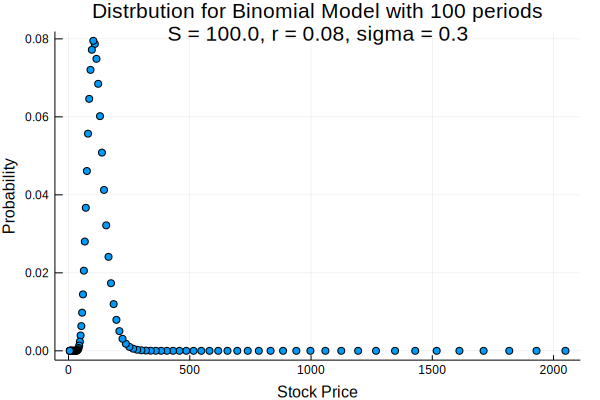

In [3]:
function computeDistribution(S, r, sigma, T, n)

    h = T / n
    u = exp(r*h + sigma * sqrt(h))
    d = exp(r*h - sigma * sqrt(h))

    p_star = (exp(r*h) - d) / (u - d)

    prices = Array{Float64}(n + 1)
    probs = Array{Float64}(n + 1)
    for k in 1:n+1
        prices[k] = S * (u ^ (n-k)) * (d ^ k)
        probs[k] = binomial(BigInt(n), BigInt(k)) * p_star^(n-k) * (1 - p_star)^k
    end

    scatter(prices, probs)
    title = "Distrbution for Binomial Model with $n periods \n S = $S, r = $r, sigma = $sigma"

    scatter!(title = title, xlabel= "Stock Price", ylabel = "Probability", legend = false)
end

computeDistribution(100.0, 0.08, 0.3, 1.0, 100)